In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import common

In [2]:
plt.style.use(["tableau-colorblind10"])

In [3]:
data = xr.open_dataset("fig_data/skill_dropout_data.nc")

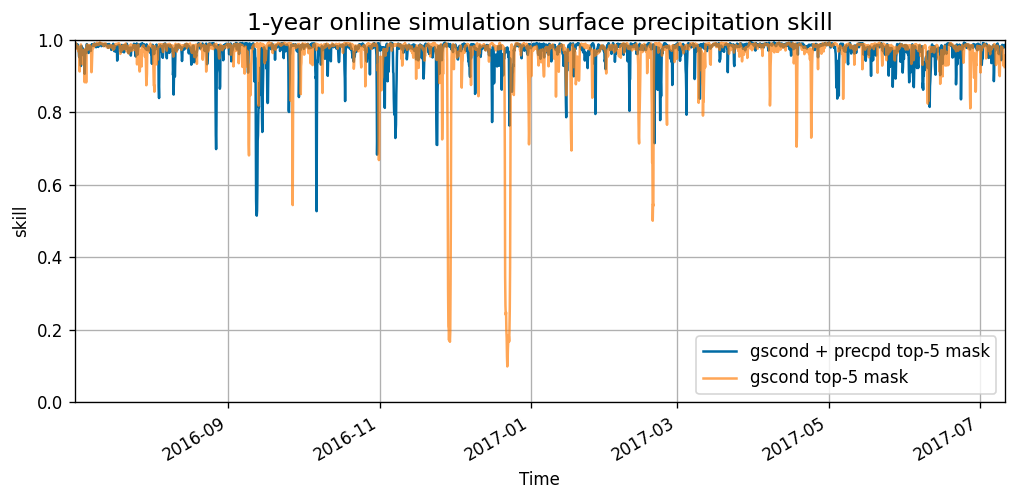

In [5]:
plt.figure(dpi=120, figsize=(10, 4))
data.skill_gscond_and_precpd_mask.plot(label="gscond + precpd top-5 mask")
data.skill_gscond_only_mask.plot(label="gscond top-5 mask", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("skill")
plt.title("1-year online simulation surface precipitation skill", size=14)
plt.xlim(data.time[0], data.time[-1])
plt.ylim(0, 1)
plt.grid()
plt.legend(loc="lower right")
common.savefig("sup_pr_skill_1year")
plt.show()

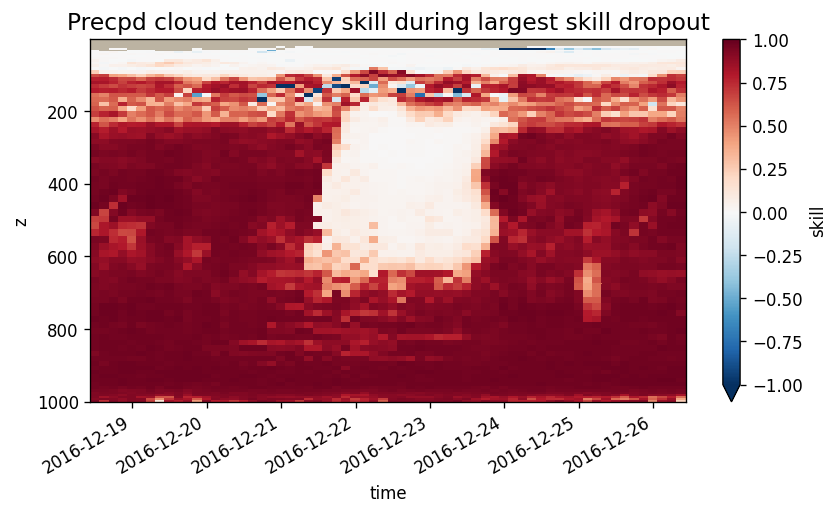

In [6]:
plt.figure(figsize=(8, 4), dpi=120)
center_time_idx = data.attrs["max_err_time_idx"]
time_pad=4*8

da = data.precpd_dc_skill.isel(time=slice(center_time_idx-time_pad, center_time_idx+time_pad))
da.plot(x="time", y="z", cmap="RdBu_r", vmin=-1, vmax=1, yincrease=False, cbar_kwargs={"label": "skill"}, rasterized=True)

plt.title(f"Precpd cloud tendency skill during largest skill dropout", size=14)
common.savefig("app_precpd_skill_1year_default")
plt.show()


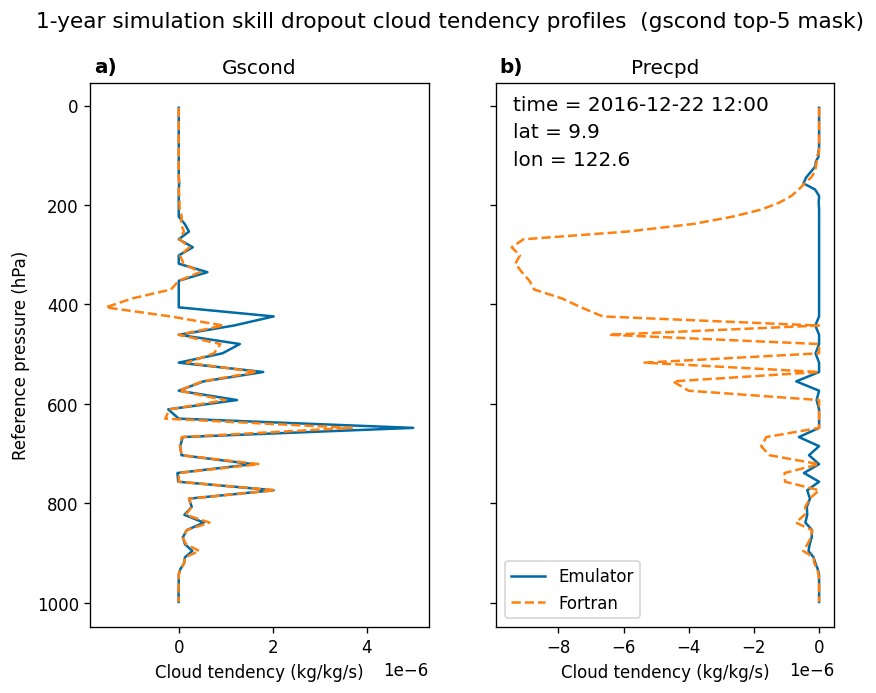

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6), dpi=120, sharey=True)
pkwargs = {"yincrease": False, "ax": ax[0]}
data.emu_gscond_max_err_loc.plot(y="z", **pkwargs, label="Emulator")
data.fort_gscond_max_err_loc.plot(y="z", **pkwargs, linestyle="--", label="Fortran")
ax[0].set_ylabel("Reference pressure (hPa)")
ax[0].set_xlabel("Cloud tendency (kg/kg/s)")
ax[0].set_title("Gscond")


pkwargs = {"yincrease": False, "ax": ax[1]}
data.emu_precpd_max_err_loc.plot(y="z", **pkwargs, label="Emulator")
data.fort_precpd_max_err_loc.plot(y="z", **pkwargs, linestyle="--", label="Fortran")
ax[1].legend(loc="lower left")
ax[1].set_xlabel("Cloud tendency (kg/kg/s)")
ax[1].set_title("Precpd")
ax[1].set_ylabel("")
current_time = np.datetime_as_string(data.time[data.attrs['max_err_time_idx']].values, unit='m')
current_time = (" ").join(current_time.split("T"))
ax[1].text(0.05, 0.95, f"time = {current_time}", transform=ax[1].transAxes, size=12)
ax[1].text(0.05, 0.9, f"lat = {data.attrs['max_err_loc_lat']:1.1f}", transform=ax[1].transAxes, size=12)
ax[1].text(0.05, 0.85, f"lon = {data.attrs['max_err_loc_lon']:1.1f}", transform=ax[1].transAxes, size=12)

ax[0].text(0.01, 1.02, "a)", transform=ax[0].transAxes, size=12, weight="bold")
ax[1].text(0.01, 1.02, "b)", transform=ax[1].transAxes, size=12, weight="bold")
plt.suptitle("1-year simulation skill dropout cloud tendency profiles  (gscond top-5 mask)", size=13)
common.savefig("app_precpd_skill_miss")
plt.show()